# Wikipedia Dataset

<p> Students: Manana Lortkipanidze, Alexandru Mocanu </p>

<p> Data Visualization class, Fall 2018 </p>

In [30]:
import pandas as pd
import numpy as np
import pickle
import urllib
import matplotlib.pyplot as plt

## 1. Data Loading and Preprocessing

<p> Firstly, we will proceed with data loading. Afterwards, it will be useful to explore categories and labels. As well as create adjacency matrix (network) from Wikipedia dataset for further analysis. 
    
<p> We queried number of visits in 2017 for all articles contained in "categories.tsv" dataset from Wikipedia API. Results are stored in wiki_data.pkl file. </p>

In [2]:
DATA_DIR = 'data'

In [3]:
def load_pickle(file_path):
    """ Method for pickle file loading
    
        input:    file_path   -relative path of the file to be loaded
        
        output:   df          -dataframe containinf pickled file
    """
    
    with open(file_path, 'rb') as file:
        
        return pickle.load(file)

In [4]:
#reading articles
articles = pd.read_csv(DATA_DIR + '/articles.tsv', 
                       encoding='utf-8', 
                       engine='python', 
                       header=None, 
                       comment='#')

#reading categories
categories = pd.read_csv(DATA_DIR + '/categories.tsv', 
                         sep='\t', encoding='utf-8', 
                         engine='python', 
                         header=None, 
                         comment='#',
                         names=['name', 'categories'])

#reading pickle file containing number of visits in 2017 for given articles
article_visits_2017 = load_pickle(DATA_DIR + '/wiki_data.pkl')

### Categories

In [5]:
def explore_dataset(df, name):

    print("Exploring Dataset %s:" % name)
    
    #display first few rows of dataset
    display(df.head())

    #describe dataframe
    display(df.describe())

    #check for null values
    print("Null Values in %s Dataset: %s " % (name, df.isnull().values.any()))
    print("Na   Values in %s Dataset: %s " % (name, df.isna().values.any()))

In [6]:
explore_dataset(categories, "Categories")

Exploring Dataset Categories:


,name,categories
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists


,name,categories
count,5204,5204
unique,4598,129
top,Boyle_Roche,subject.Countries
freq,3,229


Null Values in Categories Dataset: False 
Na   Values in Categories Dataset: False 


As we see, we have 5204 articles with their corresponding categories with no missing values. However, we have redundant subject. prefix for categories as well as duplicated values (4598 out of 5204 are unique). Therefore, we need to preprocess categories dataframe.

In [7]:
def categories_preprocess(df_original):
    
    df = df_original.copy()
    
    #remove subject. prefix from categories column
    print("removing subject. prefix from categories")
    df['categories'] = df['categories'].apply(lambda x: x[8:])
    
    #modify character encoding
    df['name'] = df['name'].apply(lambda s: urllib.parse.unquote(s))

    #drop duplicate articles
    print("dropping duplicate articles")
    df = df.drop_duplicates(['name'], keep='first')
    
    display(df.describe())
    display(df.head())
    
    return df

In [8]:
#preprocess categories dataset
df_categories = categories_preprocess(categories)

removing subject. prefix from categories
dropping duplicate articles


,name,categories
count,4598,4598
unique,4598,127
top,Bill_Clinton,Science.Biology.Birds
freq,1,161


,name,categories
0,Áedán_mac_Gabráin,History.British_History.British_History_1500_a...
2,Åland,Countries
4,Édouard_Manet,People.Artists
5,Éire,Countries
7,Óengus_I_of_the_Picts,History.British_History.British_History_1500_a...


## article_visits_2017

We used the information provided above to query page visits for given articles in 2017.

In [9]:
explore_dataset(article_visits_2017[["article"]], "Article Visits in 2017")

display(article_visits_2017.head())

Exploring Dataset Article Visits in 2017:


,article
0,Áedán mac Gabráin
1,Åland
2,Édouard Manet
3,Éire
4,Óengus I of the Picts


,article
count,4560
unique,4560
top,Indo-Greek Kingdom
freq,1


Null Values in Article Visits in 2017 Dataset: False 
Na   Values in Article Visits in 2017 Dataset: False 


,article,categories,traffic
0,Áedán mac Gabráin,"[600s deaths, 6th-century Irish monarchs, 6th-...","[[35, 2017-01-01T00:00:00], [42, 2017-01-02T00..."
1,Åland,"[1920 establishments in Europe, All articles c...","[[136, 2017-01-01T00:00:00], [184, 2017-01-02T..."
2,Édouard Manet,"[1832 births, 1883 deaths, 19th-century French...","[[703, 2017-01-01T00:00:00], [895, 2017-01-02T..."
3,Éire,[Articles containing Ancient Greek-language te...,"[[320, 2017-01-01T00:00:00], [368, 2017-01-02T..."
4,Óengus I of the Picts,"[761 deaths, 7th-century births, 8th-century S...","[[28, 2017-01-01T00:00:00], [32, 2017-01-02T00..."


We add node_idx colour to number article nodes for the future.

In [10]:
def preprocess_article_visits_2017(df_original):
    df = df_original.copy()
    #df['article'] = df['article'].apply(lambda s: urllib.parse.quote(s))

    df['article'] = df['article'].apply(lambda s: s.replace(" ", "_"))
    df.reset_index(level=0, inplace=True)
    df = df.rename(columns={'index':'node_idx'})
    return df

df_article_visits_2017 = preprocess_article_visits_2017(article_visits_2017)
df_article_visits_2017.head()

,node_idx,article,categories,traffic
0,0,Áedán_mac_Gabráin,"[600s deaths, 6th-century Irish monarchs, 6th-...","[[35, 2017-01-01T00:00:00], [42, 2017-01-02T00..."
1,1,Åland,"[1920 establishments in Europe, All articles c...","[[136, 2017-01-01T00:00:00], [184, 2017-01-02T..."
2,2,Édouard_Manet,"[1832 births, 1883 deaths, 19th-century French...","[[703, 2017-01-01T00:00:00], [895, 2017-01-02T..."
3,3,Éire,[Articles containing Ancient Greek-language te...,"[[320, 2017-01-01T00:00:00], [368, 2017-01-02T..."
4,4,Óengus_I_of_the_Picts,"[761 deaths, 7th-century births, 8th-century S...","[[28, 2017-01-01T00:00:00], [32, 2017-01-02T00..."


## 2. Adjacency Matrix

In [11]:
#reading hyperlinks dataset
links = pd.read_csv(DATA_DIR + '/links.tsv', 
                    sep='\t', 
                    encoding='utf-8', 
                    engine='python', 
                    header=None, 
                    comment='#',
                    names=['source', 'target'])

links['source'] = links['source'].apply(lambda s: urllib.parse.unquote(s))
links['target'] = links['target'].apply(lambda s: urllib.parse.unquote(s))

explore_dataset(links, "Links")

Exploring Dataset Links:


,source,target
0,Áedán_mac_Gabráin,Bede
1,Áedán_mac_Gabráin,Columba
2,Áedán_mac_Gabráin,Dál_Riata
3,Áedán_mac_Gabráin,Great_Britain
4,Áedán_mac_Gabráin,Ireland


,source,target
count,119882,119882
unique,4587,4135
top,United_States,United_States
freq,294,1551


Null Values in Links Dataset: False 
Na   Values in Links Dataset: False 


In [12]:
# Create a conversion table from name to node index.
name2idx = df_article_visits_2017[['node_idx', 'article']]
name2idx = name2idx.set_index('article')
name2idx.head()

,node_idx
article,
Áedán_mac_Gabráin,0
Åland,1
Édouard_Manet,2
Éire,3
Óengus_I_of_the_Picts,4


In [22]:
def join_links_sources_targets():
    
    merged_links = links.join(name2idx, on='source') \
                        .join(name2idx, on='target', rsuffix='_target') \
                        .drop(columns=['source', 'target']) \
                        .dropna()
    
    merged_links['node_idx'] = merged_links['node_idx'].astype(int)
    merged_links['node_idx_target'] = merged_links['node_idx_target'].astype(int)
    return merged_links

merged_links =  join_links_sources_targets()
display(merged_links.head())
merged_links.describe()

,node_idx,node_idx_target
0,0,526
1,0,964
2,0,1103
3,0,1750
4,0,2126


,node_idx,node_idx_target
count,118572.000000,118572.000000
mean,2265.753913,2276.626834
std,1304.809385,1329.946081
min,0.000000,6.000000
25%,1163.000000,1104.000000
50%,2276.000000,2230.000000
75%,3383.000000,3437.250000
max,4559.000000,4559.000000


In [27]:
n_nodes = len(df_article_visits_2017)

def create_adjacency_matrix(df):
    adjacency = np.zeros((n_nodes, n_nodes), dtype=int)
    
    for idx, row in df.iterrows():
        if np.isnan(row.node_idx_target):
            continue
        
        i, j = int(row.node_idx), int(row.node_idx_target)
        adjacency[i, j] = 1
    
    return adjacency

adjacency = create_adjacency_matrix(merged_links)
adjacency[:15, :15]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

Text(0.5,1.05,'adjacency matrix')

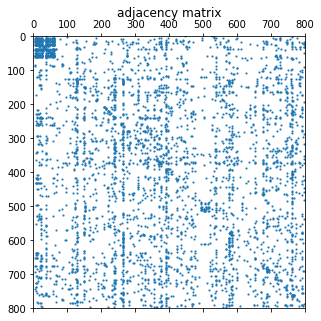

In [39]:
plt.spy(adjacency[:800, :800], markersize=1)
plt.rcParams['figure.figsize'] = 15, 5
plt.title('adjacency matrix')

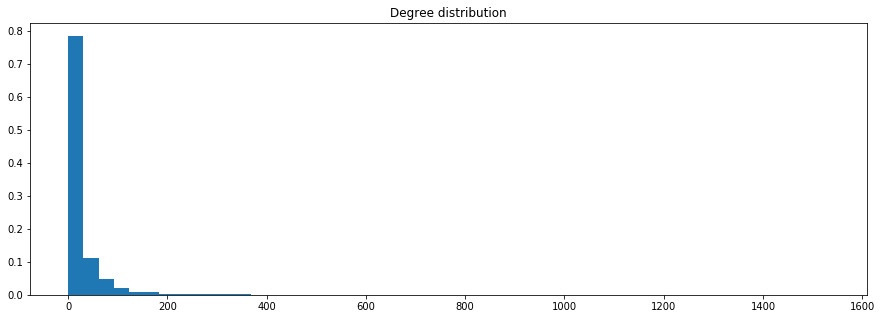

In [40]:
degree =  np.sum(adjacency, axis=0)

weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights, bins=50)
plt.title('Degree distribution')
plt.show()